<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/SoportVectorMachineRegresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Imports

In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Configuraciones para gráficos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ignorar advertencias
warnings.filterwarnings('ignore')

##Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='latin1', header=0)

df.columns = df.columns.str.replace(';', '')

df.head(10)

df = df.dropna()
df['RoundStartingEquipmentValue'] = df['RoundStartingEquipmentValue'].fillna(df['RoundStartingEquipmentValue'].median())
df = pd.get_dummies(df, columns=['Map'], drop_first=True)
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


##SoportVectorMachine

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022.csv


/tmp/ipython-input-6-1145610887.py:16: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(name, sep=";", on_bad_lines="skip")



📋 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.62      1.00      0.76        13

    accuracy                           0.62        21
   macro avg       0.31      0.50      0.38        21
weighted avg       0.38      0.62      0.47        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


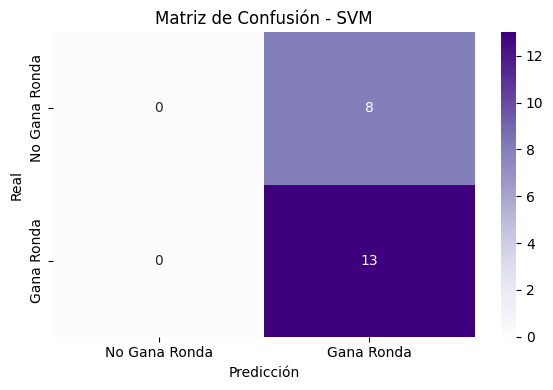

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# --- File Upload ---
uploaded = files.upload()
for fn in uploaded.keys():
    name = fn

# --- 1. Cargar y limpiar datos ---
df = pd.read_csv(name, sep=";", on_bad_lines="skip")

# Variables a usar
features = [
    'TimeAlive', 'TravelledDistance', 'RoundKills', 'MatchKills',
    'RoundAssists', 'MatchAssists', 'RoundHeadshots'
]
target = 'RoundWinner'

# Limpiar datos
df = df[features + [target]].dropna()
for col in features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True)

# Convertir a 0/1 la variable objetivo
df[target] = df[target].astype(str).str.lower().map({'true': 1, 'false': 0})

# --- 2. Dividir en entrenamiento y prueba ---
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# --- 3. Estandarizar variables (muy importante para SVM) ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- 4. Entrenar modelo SVM ---
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# --- 5. Evaluar modelo ---
y_pred = svm.predict(X_test_scaled)

print("\n📋 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Matriz de Confusión
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Gana Ronda", "Gana Ronda"],
            yticklabels=["No Gana Ronda", "Gana Ronda"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión - SVM")
plt.tight_layout()
plt.show()